In [1]:
import pandas as pd

In [8]:
# download csv file from resurces and put it in working directory
df = pd.read_csv('dam_occupancy.csv', header = 0)

In [9]:
df.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386
3,2005-01-04,44.42,386
4,2005-01-05,44.35,385


In [10]:
df1 = df.drop(['GENERAL_DAM_RESERVED_WATER'], axis=1)

In [11]:
df1.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47
3,2005-01-04,44.42
4,2005-01-05,44.35


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887 entries, 0 to 5886
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        5887 non-null   object 
 1   GENERAL_DAM_OCCUPANCY_RATE  5887 non-null   float64
 2   GENERAL_DAM_RESERVED_WATER  5887 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 138.1+ KB


In [13]:
df2 = pd.read_csv('dam_occupancy.csv', header = 0, parse_dates = [0])

In [14]:
df2.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386
3,2005-01-04,44.42,386
4,2005-01-05,44.35,385


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887 entries, 0 to 5886
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        5887 non-null   datetime64[ns]
 1   GENERAL_DAM_OCCUPANCY_RATE  5887 non-null   float64       
 2   GENERAL_DAM_RESERVED_WATER  5887 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 138.1 KB


In [23]:
df3 = df2.drop(['GENERAL_DAM_RESERVED_WATER'], axis=1)
df3.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47
3,2005-01-04,44.42
4,2005-01-05,44.35


In [42]:
series = pd.read_csv('dam_occupancy.csv', header = 0, parse_dates = [0], index_col=0, squeeze=True)

In [43]:
series.head()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
DATE,,
2005-01-01,44.62,388
2005-01-02,44.62,388
2005-01-03,44.47,386
2005-01-04,44.42,386
2005-01-05,44.35,385


In [41]:
print(type(series))

<class 'pandas.core.frame.DataFrame'>


In [32]:
series1 = series.drop(['GENERAL_DAM_RESERVED_WATER'], axis=1)

In [33]:
series1.head()

,GENERAL_DAM_OCCUPANCY_RATE
DATE,
2005-01-01,44.62
2005-01-02,44.62
2005-01-03,44.47
2005-01-04,44.42
2005-01-05,44.35


In [44]:
my_series = series1.squeeze()

In [45]:
print(type(my_series))

<class 'pandas.core.series.Series'>


In [39]:
my_series.shape

(5887,)

In [35]:
df3.shape

(5887, 2)

In [40]:
my_series.describe()

count    5887.000000
mean       64.783693
std        23.460365
min         9.200000
25%        48.005000
50%        66.680000
75%        86.265000
max        99.160000
Name: GENERAL_DAM_OCCUPANCY_RATE, dtype: float64

In [27]:
df3.describe()

,GENERAL_DAM_OCCUPANCY_RATE
count,5887.000000
mean,64.783693
std,23.460365
min,9.200000
25%,48.005000
50%,66.680000
75%,86.265000
max,99.160000


In [46]:
###Feature Engineering
#create new feature
#DATETIME FEATURES
df3.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47
3,2005-01-04,44.42
4,2005-01-05,44.35


In [47]:
features = df3.copy()

In [48]:
features['year'] = df3['DATE'].dt.year

In [49]:
features['month'] = df3['DATE'].dt.month

In [50]:
features['day'] = df3['DATE'].dt.day

In [52]:
features.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,year,month,day
0,2005-01-01,44.62,2005,1,1
1,2005-01-02,44.62,2005,1,2
2,2005-01-03,44.47,2005,1,3
3,2005-01-04,44.42,2005,1,4
4,2005-01-05,44.35,2005,1,5


In [53]:
#LAG FEATURES
features['lag1'] = df3['GENERAL_DAM_OCCUPANCY_RATE'].shift(1)#bir gun oncesi

In [54]:
features['lag2'] = df3['GENERAL_DAM_OCCUPANCY_RATE'].shift(365)#1 yil oncesi

In [55]:
features.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,year,month,day,lag1,lag2
0,2005-01-01,44.62,2005,1,1,NaN,NaN
1,2005-01-02,44.62,2005,1,2,44.62,NaN
2,2005-01-03,44.47,2005,1,3,44.62,NaN
3,2005-01-04,44.42,2005,1,4,44.47,NaN
4,2005-01-05,44.35,2005,1,5,44.42,NaN


In [56]:
#WINDOW FEATURES
features['Roll_Mean'] = df3['GENERAL_DAM_OCCUPANCY_RATE'].rolling(window = 2).mean()

In [57]:
features.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,year,month,day,lag1,lag2,Roll_Mean
0,2005-01-01,44.62,2005,1,1,NaN,NaN,NaN
1,2005-01-02,44.62,2005,1,2,44.62,NaN,44.620
2,2005-01-03,44.47,2005,1,3,44.62,NaN,44.545
3,2005-01-04,44.42,2005,1,4,44.47,NaN,44.445
4,2005-01-05,44.35,2005,1,5,44.42,NaN,44.385


In [58]:
features['Roll_Max'] = df3['GENERAL_DAM_OCCUPANCY_RATE'].rolling(window = 3).max()

In [59]:
features.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,year,month,day,lag1,lag2,Roll_Mean,Roll_Max
0,2005-01-01,44.62,2005,1,1,NaN,NaN,NaN,NaN
1,2005-01-02,44.62,2005,1,2,44.62,NaN,44.620,NaN
2,2005-01-03,44.47,2005,1,3,44.62,NaN,44.545,44.62
3,2005-01-04,44.42,2005,1,4,44.47,NaN,44.445,44.62
4,2005-01-05,44.35,2005,1,5,44.42,NaN,44.385,44.47


In [60]:
#EXPANDING FEATURES
features['Expand_Max'] = df3['GENERAL_DAM_OCCUPANCY_RATE'].expanding().max()

In [61]:
features.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,year,month,day,lag1,lag2,Roll_Mean,Roll_Max,Expand_Max
0,2005-01-01,44.62,2005,1,1,NaN,NaN,NaN,NaN,44.62
1,2005-01-02,44.62,2005,1,2,44.62,NaN,44.620,NaN,44.62
2,2005-01-03,44.47,2005,1,3,44.62,NaN,44.545,44.62,44.62
3,2005-01-04,44.42,2005,1,4,44.47,NaN,44.445,44.62,44.62
4,2005-01-05,44.35,2005,1,5,44.42,NaN,44.385,44.47,44.62


In [63]:
##VISUALIZATION
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
df3.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47
3,2005-01-04,44.42
4,2005-01-05,44.35


<AxesSubplot:>

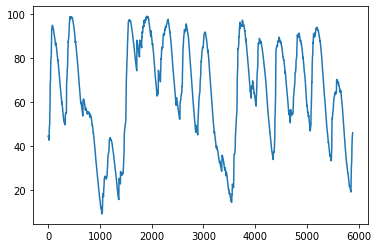

In [65]:
df3['GENERAL_DAM_OCCUPANCY_RATE'].plot()

In [66]:
df3.index = df3['DATE']

In [68]:
df3.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE
DATE,,
2005-01-01,2005-01-01,44.62
2005-01-02,2005-01-02,44.62
2005-01-03,2005-01-03,44.47
2005-01-04,2005-01-04,44.42
2005-01-05,2005-01-05,44.35


<AxesSubplot:xlabel='DATE'>

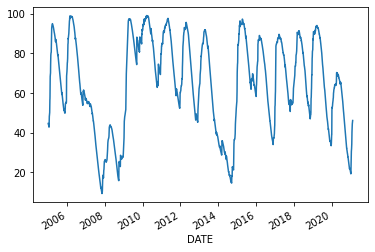

In [67]:
df3['GENERAL_DAM_OCCUPANCY_RATE'].plot()

In [72]:
##Zooming in
gecen_yil = df3[(df3['DATE'] > '2020-01-01') & (df3['DATE'] <= '2020-12-31')].copy()

In [73]:
gecen_yil

,DATE,GENERAL_DAM_OCCUPANCY_RATE
DATE,,
2020-01-02,2020-01-02,38.08
2020-01-03,2020-01-03,38.78
2020-01-04,2020-01-04,39.02
2020-01-05,2020-01-05,39.03
2020-01-06,2020-01-06,39.31
...,...,...
2020-12-27,2020-12-27,21.11
2020-12-28,2020-12-28,20.93
2020-12-29,2020-12-29,20.70


<AxesSubplot:xlabel='DATE'>

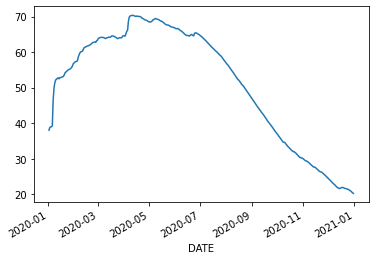

In [74]:
gecen_yil['GENERAL_DAM_OCCUPANCY_RATE'].plot()

In [76]:
yil_2020 = df3[(df3['DATE'] > '2021-01-01') & (df3['DATE'] <= '2021-02-13')].copy()

<AxesSubplot:xlabel='DATE'>

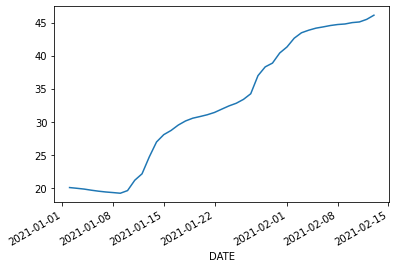

In [77]:
yil_2020['GENERAL_DAM_OCCUPANCY_RATE'].plot()

In [78]:
yil_2019 = df3[(df3['DATE'] > '2019-01-01') & (df3['DATE'] <= '2019-12-31')].copy()

<AxesSubplot:xlabel='DATE'>

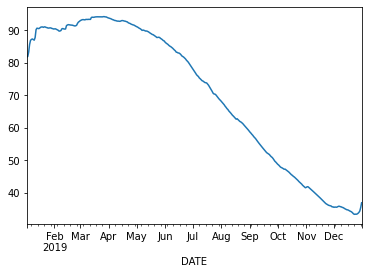

In [79]:
yil_2019['GENERAL_DAM_OCCUPANCY_RATE'].plot()

In [80]:
import seaborn as sns

<AxesSubplot:ylabel='GENERAL_DAM_OCCUPANCY_RATE'>

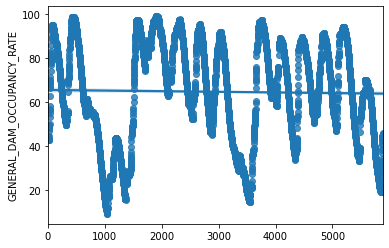

In [82]:
sns.regplot(x = df1.index.values, y=df3['GENERAL_DAM_OCCUPANCY_RATE'])
##there is no trend

<AxesSubplot:ylabel='GENERAL_DAM_OCCUPANCY_RATE'>

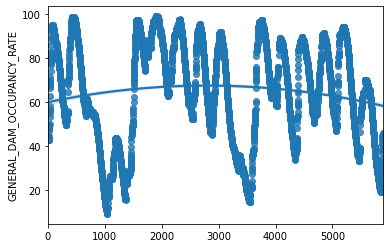

In [85]:
sns.regplot(x = df1.index.values, y=df3['GENERAL_DAM_OCCUPANCY_RATE'], order = 2)
##quadratic trendline
#seasonal pattern var grafikte goruldugu uzere
#bu durumu ortadan kaldirmak icin yearly olarak verileri aggregate edicez.

In [88]:
##Removing Seasonality
df3['year'] = df3['DATE'].dt.year

In [89]:
df3.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,year
DATE,,,
2005-01-01,2005-01-01,44.62,2005
2005-01-02,2005-01-02,44.62,2005
2005-01-03,2005-01-03,44.47,2005
2005-01-04,2005-01-04,44.42,2005
2005-01-05,2005-01-05,44.35,2005


In [90]:
df3.groupby('year')['GENERAL_DAM_OCCUPANCY_RATE'].mean()

year
2005    70.648356
2006    78.240356
2007    35.621233
2008    30.666995
2009    82.414740
2010    84.617781
2011    78.900658
2012    71.262186
2013    68.207178
2014    29.591452
2015    80.102685
2016    64.265082
2017    71.840000
2018    72.506740
2019    70.468795
2020    51.253132
2021    32.110444
Name: GENERAL_DAM_OCCUPANCY_RATE, dtype: float64

<AxesSubplot:xlabel='year'>

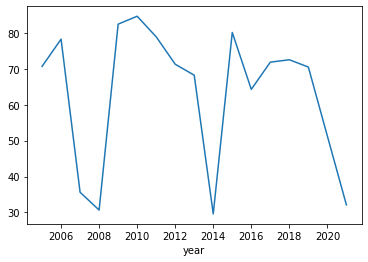

In [91]:
df3.groupby('year')['GENERAL_DAM_OCCUPANCY_RATE'].mean().plot()

In [92]:
df3['lag1'] = df3['GENERAL_DAM_OCCUPANCY_RATE'].shift(1)

In [93]:
df3.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,year,lag1
DATE,,,,
2005-01-01,2005-01-01,44.62,2005,NaN
2005-01-02,2005-01-02,44.62,2005,44.62
2005-01-03,2005-01-03,44.47,2005,44.62
2005-01-04,2005-01-04,44.42,2005,44.47
2005-01-05,2005-01-05,44.35,2005,44.42


<AxesSubplot:xlabel='lag1', ylabel='GENERAL_DAM_OCCUPANCY_RATE'>

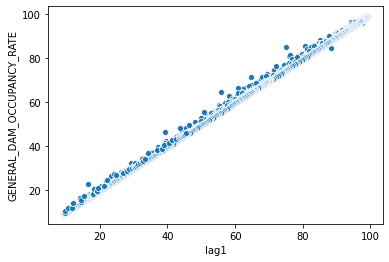

In [94]:
sns.scatterplot(x=df3['lag1'], y=df3['GENERAL_DAM_OCCUPANCY_RATE'])
#positive correlation between lag values and feature


In [95]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

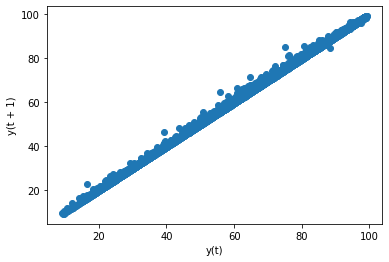

In [96]:
lag_plot(df3['GENERAL_DAM_OCCUPANCY_RATE'])

In [97]:
## I want to see correlation of the possible lag values --> Autocorrelation
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

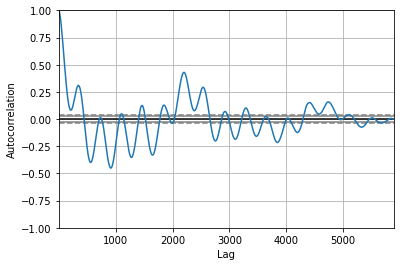

In [98]:
autocorrelation_plot(df3['GENERAL_DAM_OCCUPANCY_RATE'])
##what is correlation between the values and lags

In [100]:
df1.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47
3,2005-01-04,44.42
4,2005-01-05,44.35


In [101]:
#DECOMPOSING TIME SERIES
from statsmodels.tsa.seasonal import seasonal_decompose

In [104]:
df_decomp = pd.read_csv('dam_occupancy.csv', header = 0, parse_dates = [0])

In [105]:
df_decomp1 = df_decomp.drop(['GENERAL_DAM_RESERVED_WATER'], axis=1)

In [109]:
df_decomp1.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE
DATE,,
2005-01-01,2005-01-01,44.62
2005-01-02,2005-01-02,44.62
2005-01-03,2005-01-03,44.47
2005-01-04,2005-01-04,44.42
2005-01-05,2005-01-05,44.35


In [111]:
df_decomp1.index = df_decomp1['DATE']

In [113]:
df_decomp1.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE
DATE,,
2005-01-01,2005-01-01,44.62
2005-01-02,2005-01-02,44.62
2005-01-03,2005-01-03,44.47
2005-01-04,2005-01-04,44.42
2005-01-05,2005-01-05,44.35


In [116]:
df_decomp2 = df_decomp1.drop(['DATE'], axis=1)

In [119]:
df_decomp2.sort_index(inplace=True)

In [120]:
df_decomp2.head()

,GENERAL_DAM_OCCUPANCY_RATE
DATE,
2005-01-01,44.62
2005-01-02,44.62
2005-01-03,44.47
2005-01-04,44.42
2005-01-05,44.35


In [128]:
result = seasonal_decompose(df_decomp2['GENERAL_DAM_OCCUPANCY_RATE'], model = 'additive', period=1)

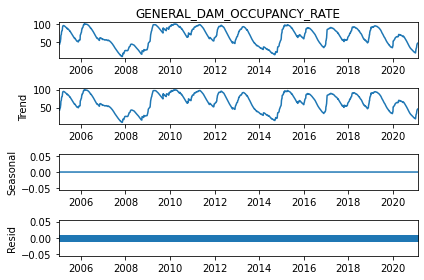

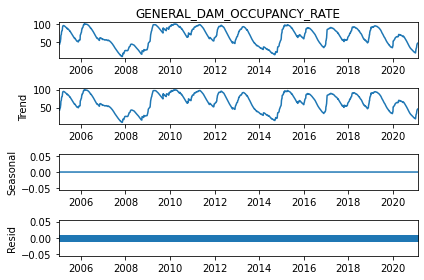

In [129]:
result.plot()

In [133]:
result2 = seasonal_decompose(df_decomp2['GENERAL_DAM_OCCUPANCY_RATE'], model = 'multiplicative',period = 1)

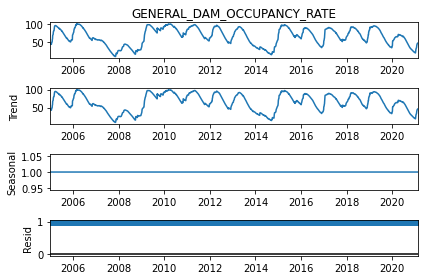

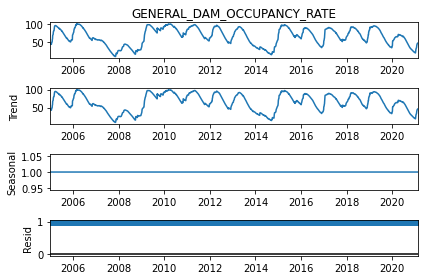

In [134]:
result2.plot()

In [138]:
#TRAIN AND SPLIT
series1.head()

,GENERAL_DAM_OCCUPANCY_RATE
DATE,
2005-01-01,44.62
2005-01-02,44.62
2005-01-03,44.47
2005-01-04,44.42
2005-01-05,44.35


In [139]:
train_size = int(series1.shape[0]*0.8)
train_size

4709

In [140]:
train = series1[0:train_size]

In [142]:
test = series1[train_size:]

In [143]:
train.shape

(4709, 1)

In [144]:
test.shape

(1178, 1)

In [145]:
#Nâive(persitence) model
series1['t'] = series1['GENERAL_DAM_OCCUPANCY_RATE'].shift(1) 
series1.head()

,GENERAL_DAM_OCCUPANCY_RATE,t
DATE,,
2005-01-01,44.62,NaN
2005-01-02,44.62,44.62
2005-01-03,44.47,44.62
2005-01-04,44.42,44.47
2005-01-05,44.35,44.42


In [148]:
train, test = series1[1:series1.shape[0]-7], series1[series1.shape[0]-7:]

In [149]:
train.head()

,GENERAL_DAM_OCCUPANCY_RATE,t
DATE,,
2005-01-02,44.62,44.62
2005-01-03,44.47,44.62
2005-01-04,44.42,44.47
2005-01-05,44.35,44.42
2005-01-06,44.26,44.35


In [150]:
train_X, train_y = train['t'], train['GENERAL_DAM_OCCUPANCY_RATE']
test_X, test_y = test['t'], test['GENERAL_DAM_OCCUPANCY_RATE']

In [ ]:
#walk Forward Validation

In [151]:
predictions = test_X.copy()

In [152]:
print(predictions)

DATE
2021-02-07    44.34
2021-02-08    44.55
2021-02-09    44.70
2021-02-10    44.78
2021-02-11    44.99
2021-02-12    45.09
2021-02-13    45.48
Name: t, dtype: float64


In [153]:
print(test_y)

DATE
2021-02-07    44.55
2021-02-08    44.70
2021-02-09    44.78
2021-02-10    44.99
2021-02-11    45.09
2021-02-12    45.48
2021-02-13    46.11
Name: GENERAL_DAM_OCCUPANCY_RATE, dtype: float64


In [154]:
from sklearn.metrics import mean_squared_error

In [155]:
mse = mean_squared_error(test_y,predictions)

In [156]:
mse

0.09658571428571394

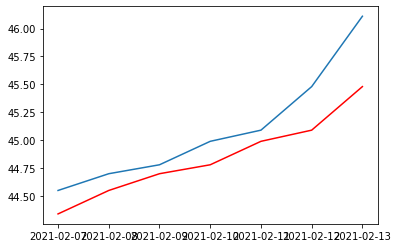

In [159]:
plt.plot(test_y)
plt.plot(predictions, color = 'red')
#blue; actual values
#red: predict values

In [218]:
newseries = series1.drop(['t'], axis=1)

In [220]:
newseries.head()

,GENERAL_DAM_OCCUPANCY_RATE
DATE,
2005-01-01,44.62
2005-01-02,44.62
2005-01-03,44.47
2005-01-04,44.42
2005-01-05,44.35


In [221]:
train, test = newseries.GENERAL_DAM_OCCUPANCY_RATE[1:newseries.shape[0]-7], newseries.GENERAL_DAM_OCCUPANCY_RATE[newseries.shape[0]-7:]

In [222]:
train.head()

DATE
2005-01-02    44.62
2005-01-03    44.47
2005-01-04    44.42
2005-01-05    44.35
2005-01-06    44.26
Name: GENERAL_DAM_OCCUPANCY_RATE, dtype: float64

In [223]:
#Auto Regression model --> if you dont have seasonality or trend you can usee it.
from statsmodels.tsa.ar_model import AR

In [224]:
model = AR(train)
model_fit = model.fit()

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN,

In [225]:
#autoregression means regression on the lag values
#number of lag variables
model_fit.k_ar

33

In [226]:
#Coef. of lag variables
model_fit.params
#sadece 33 lag value onemli bizim icin

const                             0.082524
L1.GENERAL_DAM_OCCUPANCY_RATE     1.519863
L2.GENERAL_DAM_OCCUPANCY_RATE    -0.592790
L3.GENERAL_DAM_OCCUPANCY_RATE     0.132230
L4.GENERAL_DAM_OCCUPANCY_RATE    -0.023348
L5.GENERAL_DAM_OCCUPANCY_RATE    -0.028776
L6.GENERAL_DAM_OCCUPANCY_RATE     0.050729
L7.GENERAL_DAM_OCCUPANCY_RATE    -0.039421
L8.GENERAL_DAM_OCCUPANCY_RATE     0.005640
L9.GENERAL_DAM_OCCUPANCY_RATE    -0.030320
L10.GENERAL_DAM_OCCUPANCY_RATE    0.002700
L11.GENERAL_DAM_OCCUPANCY_RATE    0.015278
L12.GENERAL_DAM_OCCUPANCY_RATE    0.031875
L13.GENERAL_DAM_OCCUPANCY_RATE   -0.048885
L14.GENERAL_DAM_OCCUPANCY_RATE    0.044504
L15.GENERAL_DAM_OCCUPANCY_RATE   -0.059851
L16.GENERAL_DAM_OCCUPANCY_RATE    0.044349
L17.GENERAL_DAM_OCCUPANCY_RATE   -0.011173
L18.GENERAL_DAM_OCCUPANCY_RATE   -0.026927
L19.GENERAL_DAM_OCCUPANCY_RATE    0.025512
L20.GENERAL_DAM_OCCUPANCY_RATE    0.004377
L21.GENERAL_DAM_OCCUPANCY_RATE   -0.023038
L22.GENERAL_DAM_OCCUPANCY_RATE    0.009472
L23.GENERAL

In [227]:
predictions = model_fit.predict(start = len(train), end= len(train)+len(test)-1)

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [228]:
predictions

5879    44.727536
5880    45.274656
5881    45.965821
5882    46.624697
5883    47.343082
5884    48.039008
5885    48.748401
dtype: float64

In [229]:
predictions.iloc[0]

44.727535920514725

In [230]:
mse = mean_squared_error(test_y,predictions1)

In [231]:
mse

3.2894598151243812

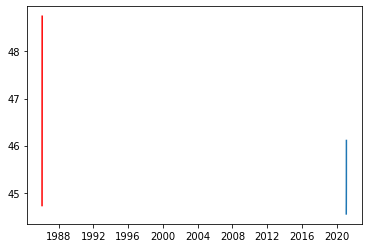

In [232]:
plt.plot(test_y)
plt.plot(predictions, color = 'red')

In [236]:
import numpy as np

In [259]:
##Walk Forward
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN,

0.34849679297962544
0.41245009026965135
0.45120256364279465
0.3079080400292863
0.44477080089133963
0.29511405009810765
0.47829630739844126


In [260]:
predict

[0.34849679297962544,
 0.41245009026965135,
 0.45120256364279465,
 0.3079080400292863,
 0.44477080089133963,
 0.29511405009810765,
 0.47829630739844126]

In [261]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

0.05518899972721936

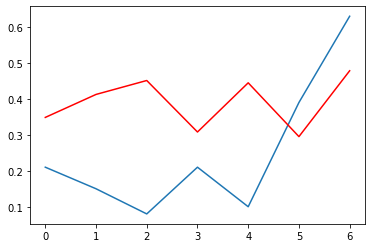

In [262]:
plt.plot(test.values)
plt.plot(predict, color = 'red')

In [263]:
##ARIMA MODEL

In [264]:
newseries.head()

,GENERAL_DAM_OCCUPANCY_RATE
DATE,
2005-01-01,44.62
2005-01-02,44.62
2005-01-03,44.47
2005-01-04,44.42
2005-01-05,44.35


<AxesSubplot:xlabel='DATE'>

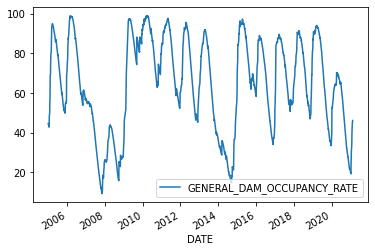

In [265]:
newseries.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

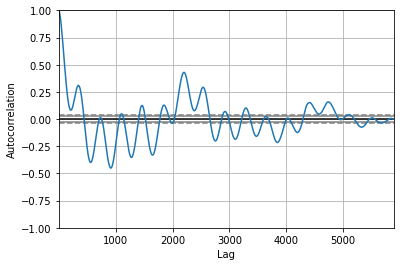

In [267]:
##Autocorrelation plot
autocorrelation_plot(newseries)

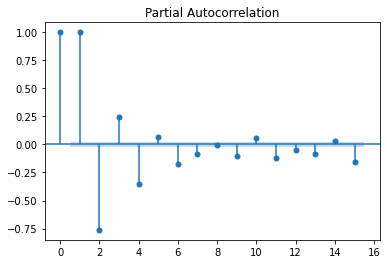

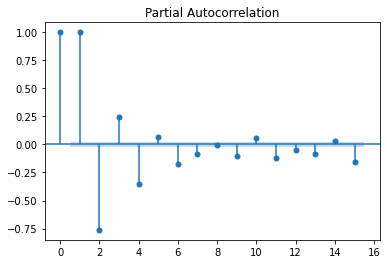

In [271]:
##Partial autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(newseries,lags =15)

In [272]:
from statsmodels.tsa.arima_model import ARIMA

In [273]:
model = ARIMA(newseries, order = (5,2,3))

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [274]:
model_fit = model.fit()

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [275]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARIMA Model Results                                   
=========================================================================================
Dep. Variable:     D2.GENERAL_DAM_OCCUPANCY_RATE   No. Observations:                 5885
Model:                            ARIMA(5, 2, 3)   Log Likelihood               -3177.449
Method:                                  css-mle   S.D. of innovations              0.415
Date:                           Fri, 07 May 2021   AIC                           6374.897
Time:                                   02:44:40   BIC                           6441.699
Sample:                                        2   HQIC                          6398.118
                                                                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                4.333e-05      0.001      0.075      0.940      -0.001       0.001
ar.L1.D2.GENERAL_DAM_OCCUPANCY_RATE    -1.4961      0.014   -103.884      0.000      -1.524      -1.468
ar.L2.D2.GENERAL_DAM_OCCUPANCY_RATE    -0.1597      0.028     -5.721      0.000      -0.214      -0.105
ar.L3.D2.GENERAL_DAM_OCCUPANCY_RATE     0.3127      0.029     10.800      0.000       0.256       0.369
ar.L4.D2.GENERAL_DAM_OCCUPANCY_RATE    -0.0271      0.027     -0.997      0.319      -0.080       0.026
ar.L5.D2.GENERAL_DAM_OCCUPANCY_RATE     0.0371      0.014      2.622      0.009       0.009       0.065
ma.L1.D2.GENERAL_DAM_OCCUPANCY_RATE     1.0372      0.006    162.454      0.000       1.025       1.050
ma.L2.D2.GENERAL_DAM_OCCUPANCY_RATE    -0.8504      0.013    -66.634      0.000      -0.875      -0.825
ma.L3.D2.GENERAL_DAM_OCCUPANCY_RATE    -0.9372      0.006   -145.988      0.000      -0.950      -0.925
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9890           -0.1582j            1.0016           -0.4748
AR.2           -0.9890           +0.1582j            1.0016            0.4748
AR.3            2.2768           -0.0000j            2.2768           -0.0000
AR.4            0.2151           -3.4277j            3.4344           -0.2400
AR.5            0.2151           +3.4277j            3.4344            0.2400
MA.1            1.0670           -0.0000j            1.0670           -0.0000
MA.2           -0.9872           -0.1596j            1.0000           -0.4745
MA.3           -0.9872           +0.1596j            1.0000            0.4745
-----------------------------------------------------------------------------
"""

In [276]:
residuals = model_fit.resid

<AxesSubplot:xlabel='DATE'>

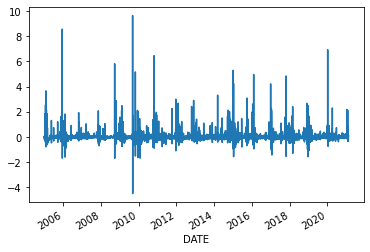

In [277]:
residuals.plot()#residualsda belli bir pattern var bu iyiye isaret 

In [278]:
residuals.describe()#residualslarin mean'nden de anlasilacagi uzere iyi bir model oldu

count    5885.000000
mean        0.000408
std         0.415226
min        -4.485708
25%        -0.110279
50%        -0.033738
75%         0.031255
max         9.635284
dtype: float64

In [279]:
output = model_fit.forecast()

In [280]:
output

(array([46.67028599]),
 array([0.41497733]),
 array([[45.85694536, 47.48362662]]))

In [281]:
model_fit.forecast(5)

(array([46.67028599, 47.21626514, 47.741538  , 48.28264894, 48.80979384]),
 array([0.41497733, 0.76233798, 1.05533563, 1.31955319, 1.56796497]),
 array([[45.85694536, 47.48362662],
        [45.72211015, 48.71042013],
        [45.67311816, 49.80995783],
        [45.69637222, 50.86892567],
        [45.73663898, 51.88294871]]))

In [282]:
##WALK FORWARD ARIMA

In [283]:
newseries.head()

,GENERAL_DAM_OCCUPANCY_RATE
DATE,
2005-01-01,44.62
2005-01-02,44.62
2005-01-03,44.47
2005-01-04,44.42
2005-01-05,44.35


In [284]:
train_size = int(newseries.shape[0]*0.7)

In [285]:
train, test = newseries.GENERAL_DAM_OCCUPANCY_RATE[0:train_size], newseries.GENERAL_DAM_OCCUPANCY_RATE[train_size:]

In [286]:
train.shape

(4120,)

In [287]:
data = train
predict = []
for t in test:
    model = ARIMA(data, order = (5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


86.96852151754842
86.78710097066565
86.68717688276433
86.64179861194715
86.49488254102033
86.20551231774442
86.07461603324775
85.87515195574494
85.81529790026752
85.44220156584846
85.13209742213414
84.9832326471787
84.753787229221
84.72535888464073
84.62963017233989
84.6189528492541
84.47927919281406
84.3078046439097
84.11704329598743
83.90274421826557
83.58740681892704
83.42376601910847
83.48860547302743
83.38069631820973
83.39016204920209
83.19763963771592
83.13995147564249
82.90285686161556
82.74399879821421
82.43728138257534
82.11472217954261
82.11478546050895
81.74684143422344
81.6917397691344
81.30537184342131
81.08740345806302
80.93105636618466
80.57908644986557
80.37149414534555
80.17125435834552
80.0252136566121
79.83471447740318
79.54034545154244
79.27339447880877
79.1537446015158
78.92513978938598
78.79143661215143
78.64619411496031
78.38087585160021
78.12604182894073
77.8582262595159
77.4391831848353
77.1707963257686
76.87167834674727
76.96636873177319
76.64462840248825
76.

In [288]:
predict

[86.96852151754842,
 86.78710097066565,
 86.68717688276433,
 86.64179861194715,
 86.49488254102033,
 86.20551231774442,
 86.07461603324775,
 85.87515195574494,
 85.81529790026752,
 85.44220156584846,
 85.13209742213414,
 84.9832326471787,
 84.753787229221,
 84.72535888464073,
 84.62963017233989,
 84.6189528492541,
 84.47927919281406,
 84.3078046439097,
 84.11704329598743,
 83.90274421826557,
 83.58740681892704,
 83.42376601910847,
 83.48860547302743,
 83.38069631820973,
 83.39016204920209,
 83.19763963771592,
 83.13995147564249,
 82.90285686161556,
 82.74399879821421,
 82.43728138257534,
 82.11472217954261,
 82.11478546050895,
 81.74684143422344,
 81.6917397691344,
 81.30537184342131,
 81.08740345806302,
 80.93105636618466,
 80.57908644986557,
 80.37149414534555,
 80.17125435834552,
 80.0252136566121,
 79.83471447740318,
 79.54034545154244,
 79.27339447880877,
 79.1537446015158,
 78.92513978938598,
 78.79143661215143,
 78.64619411496031,
 78.38087585160021,
 78.12604182894073,
 77.8582

In [289]:
mse = mean_squared_error(test.values, predict)
mse

0.1435603946503534

In [290]:
##SARIMA MODEL

In [292]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [291]:
newseries.head()

,GENERAL_DAM_OCCUPANCY_RATE
DATE,
2005-01-01,44.62
2005-01-02,44.62
2005-01-03,44.47
2005-01-04,44.42
2005-01-05,44.35


In [294]:
result_a = seasonal_decompose(newseries['GENERAL_DAM_OCCUPANCY_RATE'], model = 'multiplicative')
result_a.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [295]:
model = SARIMAX(newseries, order = (5,1,3), seasonal_order = (1,1,1,12))

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [296]:
model_fit = model.fit()

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [297]:
residuals = model_fit.resid

<AxesSubplot:xlabel='DATE'>

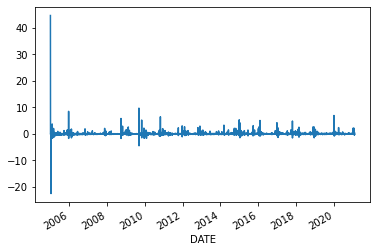

In [302]:
residuals.plot()

In [298]:
output = model_fit.forecast()

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [299]:
output

5887    46.625788
dtype: float64

In [300]:
model_fit.forecast(12)

/Users/ahsenkaraman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5887    46.625788
5888    47.043784
5889    47.447665
5890    47.813883
5891    48.154634
5892    48.522095
5893    48.893039
5894    49.224998
5895    49.564370
5896    49.928480
5897    50.279842
5898    50.598507
dtype: float64

In [301]:
yhat = model_fit.predict()

In [304]:
yhat.head()

DATE
2005-01-01     0.000000
2005-01-02    44.620004
2005-01-03    44.620001
2005-01-04    44.470001
2005-01-05    44.420001
dtype: float64

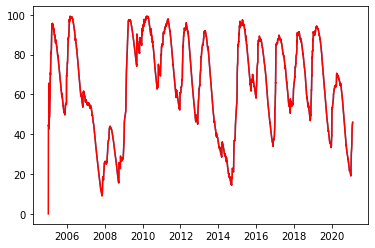

In [303]:
plt.plot(newseries)
plt.plot(yhat, color="red")